In [5]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/academic_performance_dataset_V2.csv")

df.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [7]:
df.isnull().sum()

,0
ID No,0
Prog Code,152
Gender,152
YoG,0
CGPA,152
CGPA100,152
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,152


In [8]:
df.dtypes

,0
ID No,int64
Prog Code,object
Gender,object
YoG,int64
CGPA,float64
CGPA100,float64
CGPA200,float64
CGPA300,float64
CGPA400,float64
SGPA,float64


In [9]:
df.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,NaN,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [10]:
num_cols=['YoG','CGPA','CGPA100','CGPA200','CGPA300','CGPA400','SGPA']

for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipython-input-3155648485.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [11]:
df.isnull().sum()

,0
ID No,0
Prog Code,152
Gender,152
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [12]:
cat_cols=['Prog Code', 'Gender']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-3457794383.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

,0
ID No,0
Prog Code,0
Gender,0
YoG,0
CGPA,0
CGPA100,0
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,0


In [32]:
def find_outliers_iqr():
  outliers_found = {}
  for col in num_cols:
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
    if not outliers.empty:
      outliers_found[col] = outliers.tolist()
      print(f"Number of outliers in {col}: {len(outliers.tolist())}\n")
    else:
      print(f"No outliers found in {col} using IQR method.\n")

find_outliers_iqr()

Number of outliers in YoG: 60

Number of outliers in CGPA: 60

Number of outliers in CGPA100: 59

Number of outliers in CGPA200: 60

Number of outliers in CGPA300: 60

Number of outliers in CGPA400: 57

Number of outliers in SGPA: 60



In [34]:
def outlier_limit(col):
  q3,q1=np.percentile(df[col],[75,25])
  iqr=q3-q1
  upper_limit=q3+(1.5*iqr)
  lower_limit=q1-(1.5*iqr)
  return upper_limit,lower_limit

for col in num_cols:
  upper_limit,lower_limit=outlier_limit(col)
  print(f"Column: {col}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}")
  df[col]=np.where(df[col]>upper_limit,upper_limit,df[col])
  df[col]=np.where(df[col]<lower_limit,lower_limit,df[col])


Column: YoG, Upper Limit: 2016.0, Lower Limit: 2008.0
Column: CGPA, Upper Limit: 5.50625, Lower Limit: 1.5162499999999997
Column: CGPA100, Upper Limit: 5.575000000000001, Lower Limit: 1.775
Column: CGPA200, Upper Limit: 5.739999999999999, Lower Limit: 0.9400000000000006
Column: CGPA300, Upper Limit: 6.090000000000001, Lower Limit: 0.8099999999999996
Column: CGPA400, Upper Limit: 5.97, Lower Limit: 1.1700000000000006
Column: SGPA, Upper Limit: 4.859999999999999, Lower Limit: 1.3400000000000003


In [35]:
find_outliers_iqr()
#After treating

No outliers found in YoG using IQR method.

No outliers found in CGPA using IQR method.

No outliers found in CGPA100 using IQR method.

No outliers found in CGPA200 using IQR method.

No outliers found in CGPA300 using IQR method.

No outliers found in CGPA400 using IQR method.

No outliers found in SGPA using IQR method.



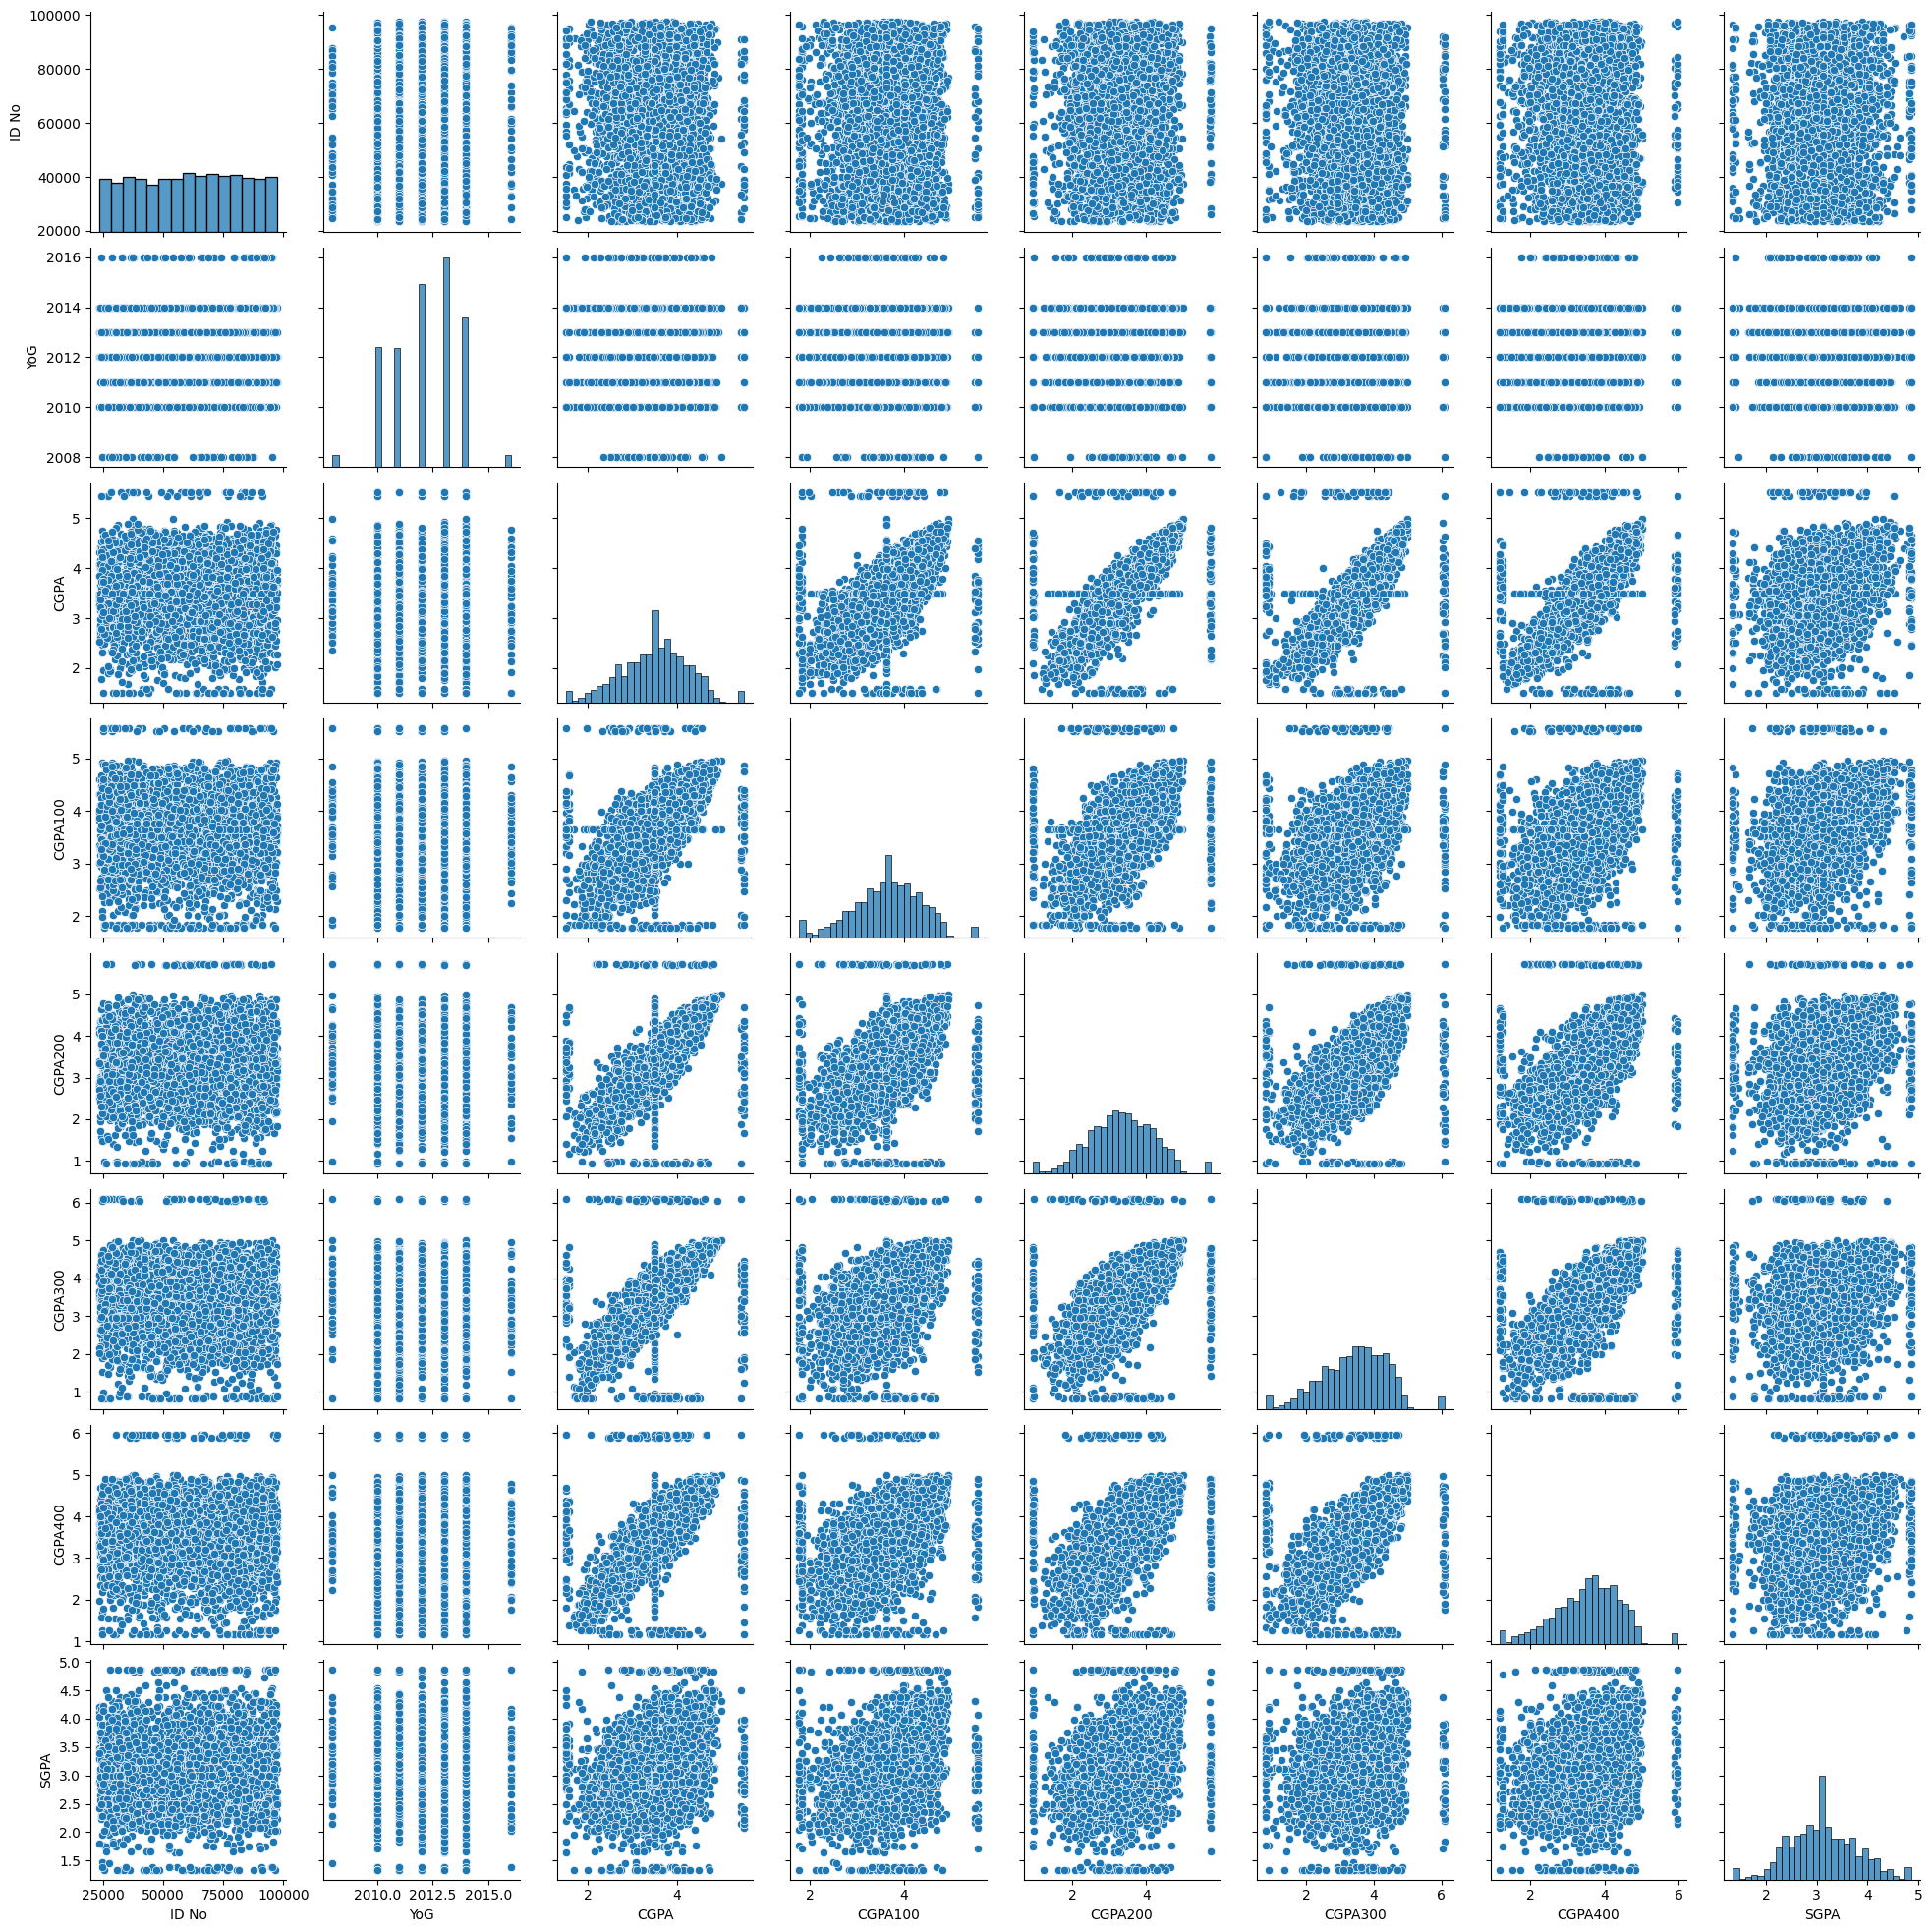

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [6]:
import numpy as np

# Define the columns where invalid entries will be introduced
columns_to_invalidate = ['CGPA', 'CGPA100', 'SGPA', 'Prog Code', 'Gender']

# Define the percentage of entries to invalidate
percentage_to_invalidate = 0.05 # 5%

for col in columns_to_invalidate:
    # Get the number of entries to invalidate for the current column
    num_invalid_entries = int(len(df) * percentage_to_invalidate)

    # Randomly select indices to set to NaN
    invalid_indices = np.random.choice(df.index, num_invalid_entries, replace=False)

    # Set the selected entries to NaN
    df.loc[invalid_indices, col] = np.nan

print(f"Introduced NaNs in columns: {columns_to_invalidate}")
print("New count of null values:")
display(df.isnull().sum())

Introduced NaNs in columns: ['CGPA', 'CGPA100', 'SGPA', 'Prog Code', 'Gender']
New count of null values:


,0
ID No,0
Prog Code,152
Gender,152
YoG,0
CGPA,152
CGPA100,152
CGPA200,0
CGPA300,0
CGPA400,0
SGPA,152


In [26]:
import numpy as np

# List of numerical columns
num_cols = ['YoG','CGPA','CGPA100','CGPA200','CGPA300','CGPA400','SGPA']

# Percentage of data points to make outliers
outlier_percentage = 0.01 # 1% of the data will be made into outliers

for col in num_cols:
    # Calculate current mean and std for the column
    mean_val = df[col].mean()
    std_val = df[col].std()

    # Determine the number of outliers to introduce for this column
    num_outliers = int(len(df) * outlier_percentage)

    if num_outliers == 0 and len(df) > 0: # Ensure at least one outlier if possible
        num_outliers = 1
    elif len(df) == 0: # Avoid division by zero if DataFrame is empty
        continue

    # Randomly select indices to introduce outliers
    outlier_indices = np.random.choice(df.index, num_outliers, replace=False)

    # Introduce extreme values: half very high, half very low
    if num_outliers > 0:
        high_outlier_count = num_outliers // 2
        low_outlier_count = num_outliers - high_outlier_count

        if high_outlier_count > 0:
            high_outlier_indices = np.random.choice(outlier_indices, high_outlier_count, replace=False)
            # Introduce a value significantly higher than the mean
            df.loc[high_outlier_indices, col] = mean_val + 10 * std_val

        if low_outlier_count > 0:
            # Get remaining indices for low outliers
            low_outlier_indices = np.setdiff1d(outlier_indices, high_outlier_indices if 'high_outlier_indices' in locals() else [])
            # Introduce a value significantly lower than the mean, ensuring it's not negative if illogical (e.g., for YoG)
            if col == 'YoG': # For 'YoG', ensure values are still somewhat realistic
                df.loc[low_outlier_indices, col] = max(mean_val - 10 * std_val, df[col].min() - 5) # Ensure it's not too far below existing min
            else:
                df.loc[low_outlier_indices, col] = mean_val - 10 * std_val

print(f"Random outliers introduced in the following numerical columns: {', '.join(num_cols)}")
print("You can now proceed to practice outlier detection and handling.")


Random outliers introduced in the following numerical columns: YoG, CGPA, CGPA100, CGPA200, CGPA300, CGPA400, SGPA
You can now proceed to practice outlier detection and handling.
